## Observations and Insights 

1.) Out of the 4 selected treatments (Ceftamin, Capomulin, Infubinol, Ramicane), Infubinol looks to be both the least effective and the treatment with the most variation, even presenting outliers. <br>
2.) Both Infubinol and Ceftamin actually show a growth in tumor volume over time. <br>
3.) Treatment Propriva shows about 2/3rds of the Timepoints of Capomulin or Ramicane. This may lead to more variation in the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])    

# Display the data table for preview
study_data_complete_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_data_complete_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_c_unique = study_data_complete_df["Mouse ID"].unique()
study_data_c_unique

study_data_group_df = study_data_complete_df.groupby('Mouse ID')['Timepoint'].count()

study_data_group_df.head(20)


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
a401    10
a411    10
a444    10
a457     3
a492    10
a520    10
a577     7
a644    10
a685    10
a699    10
a788     7
a818    10
a897    10
a963    10
b128    10
Name: Timepoint, dtype: int64

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_data_f = study_data_complete_df.sort_values("Timepoint").drop_duplicates('Mouse ID', keep='last').reset_index()        #drops all duplicate rows from the "Mouse ID" column

study_data_f

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,182,u153,0,45.000000,0,Ceftamin,Female,11,25
1,155,l872,0,45.000000,0,Placebo,Male,19,30
2,135,d133,0,45.000000,0,Zoniferol,Male,5,30
3,222,t573,0,45.000000,0,Ceftamin,Female,15,27
4,194,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...,...
244,1798,c766,45,69.823146,4,Placebo,Female,13,26
245,1797,y793,45,31.896238,2,Capomulin,Male,17,17
246,1796,h246,45,74.104086,2,Ketapril,Male,13,30
247,1794,a685,45,66.083066,3,Infubinol,Male,8,30


## Summary Statistics

In [5]:
#Finds Unique Drug Regimens
unique_regimen = study_data_f["Drug Regimen"].unique()

unique_regimen

array(['Ceftamin', 'Placebo', 'Zoniferol', 'Propriva', 'Ketapril',
       'Naftisol', 'Stelasyn', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

In [6]:
#Groups the Study_Data_f DF by drug regimen, taking the mean, std, var() values from the Tumor column.
#To Frame allows the column to be named. reset_index keeps the columns in line

unique_drug_m = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().to_frame('Mean').reset_index()
unique_drug_s = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().to_frame('Standard Deviation').reset_index()
unique_drug_v = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().to_frame('Variance').reset_index()
unique_drug_S = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().to_frame('SEM').reset_index()



In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Merges multiple dfs, via nested pd.merges
drug_summary_df = pd.merge(pd.merge(pd.merge(unique_drug_m, unique_drug_s, on=["Drug Regimen"]), unique_drug_v, on=["Drug Regimen"]), unique_drug_S, on=["Drug Regimen"])

drug_summary_df

,Drug Regimen,Mean,Standard Deviation,Variance,SEM
0,Capomulin,36.667568,5.715188,32.663378,1.143038
1,Ceftamin,57.753977,8.365568,69.982735,1.673114
2,Infubinol,58.178246,8.602957,74.010875,1.720591
3,Ketapril,62.806191,9.945920,98.921330,1.989184
4,Naftisol,61.205757,10.297083,106.029927,2.059417
5,Placebo,60.508414,8.874672,78.759797,1.774934
6,Propriva,56.736964,8.327605,69.349002,1.665521
7,Ramicane,36.191390,5.671539,32.166354,1.134308
8,Stelasyn,61.001707,9.504293,90.331586,1.940056
9,Zoniferol,59.181258,8.767099,76.862027,1.753420


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# axis = 0, Row, Axis = 1, Column

#removes the string column, less errors
drug_summary_f_df = drug_summary_df.drop(["Drug Regimen"], axis = 1)

#creates the agg of the summary statistics
drug_summary_agg = drug_summary_f_df.agg("mean", axis = 'rows')


# sets axi to output the df in a nicer fashion
drug_summary_agg_df = drug_summary_agg.to_frame()
drug_summary_agg_df = drug_summary_agg_df.set_axis(["Value"], axis=1)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg_df.head(5)


,Value
Mean,55.023147
Standard Deviation,8.407193
Variance,72.907701
SEM,1.685358


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints for all mice per Drug'}, xlabel='Drug Regimen'>

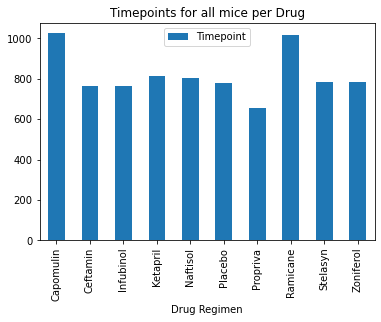

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_per_drug = study_data_f.groupby('Drug Regimen')['Timepoint'].sum()
tpd = ['Timepoint']
tp_per_drug = pd.DataFrame(tp_per_drug)

tp_per_drug.reset_index(inplace=True)      #Turns the index into a column. 
tp_per_drug = tp_per_drug.rename(columns = {'index':'Drug Regimen'})

tp_per_drug.head(20).plot(kind = 'bar', x='Drug Regimen', y ='Timepoint', title = "Timepoints for all mice per Drug")
#need to create a Dataframe with the drug Regimen and the tp per drug regimen


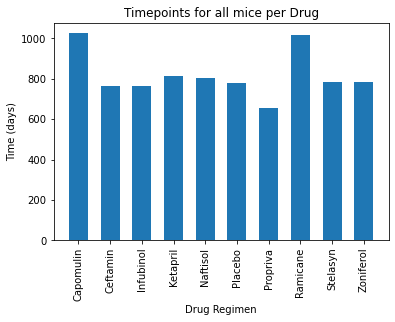

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(tp_per_drug['Drug Regimen'], tp_per_drug['Timepoint'], width = .6)
plt.title("Timepoints for all mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Time (days)")
plt.xticks(rotation = 90)

plt.show()


In [11]:
#makes the dataset to extract the pie plots from. 
sex = study_data_f.groupby('Sex').count()
del sex['Mouse ID'], sex["Timepoint"], sex['Tumor Volume (mm3)'], sex['Metastatic Sites'], sex['Drug Regimen'], sex['Age_months']
sex = sex.rename(columns = {'Weight (g)':'Count'})
sex.reset_index(inplace=True)       #turns index into column! useful for turning columns into other data
sex = sex.set_index('Sex')          #sets index to 'Sex' for pie plots '
sex

,index,Count
Sex,,
Female,124,124
Male,125,125


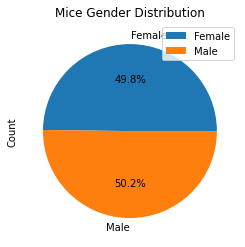

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plot = sex.plot.pie(y='Count', autopct='%1.1f%%', title = 'Mice Gender Distribution')


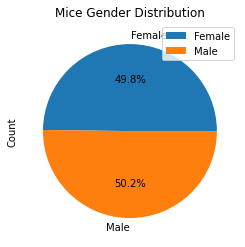

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pY = sex['Count']
pTitle = "Mice Gender Distribution"
pLabels =['Female', 'Male']
plt.pie(pY, labels = pLabels, autopct='%1.1f%%')
plt.title(pTitle)
plt.ylabel('Count')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
study_data_final_tumor_vol = study_data_f[study_data_f['Drug Regimen'] != 'Placebo']
study_data_final_tumor_vol1 = study_data_final_tumor_vol[study_data_f['Drug Regimen'] != 'Propriva']
study_data_final_tumor_vol2 = study_data_final_tumor_vol1[study_data_f['Drug Regimen'] != 'Stelasyn']
study_data_final_tumor_vol3 = study_data_final_tumor_vol2[study_data_f['Drug Regimen'] != 'Zoniferol']
study_data_final_tumor_vol4 = study_data_final_tumor_vol3[study_data_f['Drug Regimen'] != 'Ketapril']
study_data_final_tumor_vol5 = study_data_final_tumor_vol4[study_data_f['Drug Regimen'] != 'Naftisol']
study_data_final_tumor_vol5 

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,182,u153,0,45.000000,0,Ceftamin,Female,11,25
3,222,t573,0,45.000000,0,Ceftamin,Female,15,27
4,194,b447,0,45.000000,0,Ceftamin,Male,2,30
6,217,x226,0,45.000000,0,Ceftamin,Male,23,28
12,420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...,...
241,1801,e662,45,40.659006,2,Ramicane,Male,8,24
242,1800,m957,45,33.329098,1,Capomulin,Female,3,19
243,1799,z578,45,30.638696,0,Ramicane,Male,11,16
245,1797,y793,45,31.896238,2,Capomulin,Male,17,17


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
study_data_final_tumor= study_data_final_tumor_vol.groupby('Mouse ID')["Tumor Volume (mm3)"].max().to_frame('Final TV').reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_data_final_tumor

,Mouse ID,Final TV
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a366,63.440686
4,a401,66.794156
...,...,...
219,z435,48.710661
220,z578,30.638696
221,z581,62.754451
222,z795,65.741070


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Infubinol", "Ceftamin", "Ramicane"]

In [17]:
study_data_final_tumor_vol_CAP = study_data_f[study_data_f['Drug Regimen'] == "Capomulin"]
study_data_final_tumor_vol_INF = study_data_f[study_data_f['Drug Regimen'] == "Infubinol"]
study_data_final_tumor_vol_CEF = study_data_f[study_data_f['Drug Regimen'] == "Ceftamin"]
study_data_final_tumor_vol_RAM = study_data_f[study_data_f['Drug Regimen'] == "Ramicane"]


capcol = study_data_final_tumor_vol_CAP['Tumor Volume (mm3)']
infcol = study_data_final_tumor_vol_INF['Tumor Volume (mm3)']
cefcol = study_data_final_tumor_vol_CEF['Tumor Volume (mm3)']
ramcol = study_data_final_tumor_vol_RAM['Tumor Volume (mm3)']

capcolw = study_data_final_tumor_vol_CAP['Weight (g)']   #for later

tumor_dict = {treatments[0] : capcol, treatments[1] : infcol, treatments[2] : cefcol, treatments[3] : ramcol}


tumor_vol_final = pd.DataFrame(data=tumor_dict)
tumor_vol_final.head(10)
#in this scenario, 'NaN' is okay since the Boxplot automatically deals with them.

,Capomulin,Infubinol,Ceftamin,Ramicane
0,NaN,NaN,45.000000,NaN
3,NaN,NaN,45.000000,NaN
4,NaN,NaN,45.000000,NaN
6,NaN,NaN,45.000000,NaN
12,NaN,36.321346,NaN,NaN
13,NaN,NaN,NaN,43.166373
14,NaN,46.250112,NaN,NaN
16,NaN,NaN,47.784682,NaN
18,NaN,47.010364,NaN,NaN
19,NaN,45.699331,NaN,NaN


In [18]:
tumor_vol_final.describe()

,Capomulin,Infubinol,Ceftamin,Ramicane
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,58.178246,57.753977,36.191390
std,5.715188,8.602957,8.365568,5.671539
min,23.343598,36.321346,45.000000,22.050126
25%,32.377357,54.048608,48.722078,31.560470
50%,38.125164,60.165180,59.851956,36.561652
75%,40.159220,65.525743,64.299830,40.659006
max,47.685963,72.226731,68.923185,45.220869


In [19]:
#IQR in order of 'treatments'
#list made from describe()
QoneM = [32.377357, 54.048608, 48.722078, 31.560470]
QtwoM = [38.125165, 60.165180, 59.851956, 36.561652]
QthrM = [40.159220, 65.525743, 64.299830, 40.659006]
IQR = []
Loutlierbounds = []
Houtlierbounds = []
for _ in range(0,4):                 #for all 4 treatments
    IQR.append(QthrM[_] - QoneM[_])    # Calculates and appends all IQRs
    Loutlierbounds.append((QoneM[_]) - (1.5*IQR[_]))       #creates lower Outlier bound
    Houtlierbounds.append((QthrM[_]) + (1.5*IQR[_]))       #creates higher Outlier bound
    
Loutlierbounds

[20.704562500000012, 36.832905499999995, 25.35545000000001, 17.912666]

In [20]:
#Calculates all Outlier points, separated into individual Dataframes.

for _ in treatments:
    if(_ == treatments[0]):
        CapLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[0]])
        CapHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[0]])
    if(_ == treatments[1]):
        InfLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[1]])
        InfHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[1]])
    if(_ == treatments[2]):
        CefLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[2]])
        CefHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[2]])
    if(_ == treatments[3]):
        RamLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[3]])
        RamHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[3]])
    
InfLOutliers

#In this case, index 12 is the only outlier (as shown on the next boxplot as well)

,Capomulin,Infubinol,Ceftamin,Ramicane
12,NaN,36.321346,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

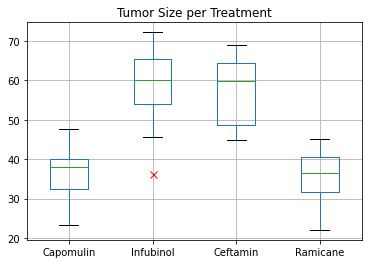

In [21]:
#Sets the options for the potential outliers, "fliers", to be red and very noticeable.
flierprops = dict(marker='x', markerfacecolor='w', markersize=7, linestyle='none', markeredgecolor='r') 

#Adds the data from the dataframe
tumor_vol_final.boxplot(column=treatments, flierprops=flierprops)

#Sets the Title 
plt.title('Tumor Size per Treatment')
plt.show

## Line and Scatter Plots

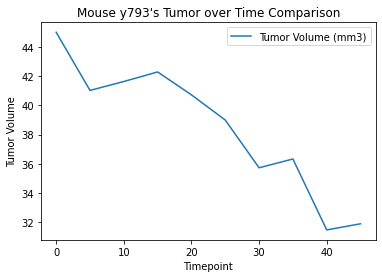

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse ID, y793
cmouse = study_data_complete_df[study_data_complete_df['Mouse ID'] == 'y793']

ypointone = cmouse['Tumor Volume (mm3)']
xpoints = cmouse['Timepoint']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.plot(xpoints, ypointone)
plt.title("Mouse y793's Tumor over Time Comparison")
plt.legend(['Tumor Volume (mm3)'])

<AxesSubplot:xlabel='Weight', ylabel='Tumor Volume (mm3)'>

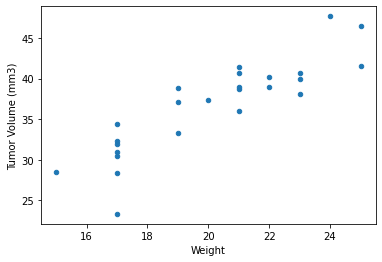

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = pd.DataFrame(capcol)
capcolw.to_frame("Weight")


Capomulin = Capomulin.assign(Weight = capcolw)
Capomulin.plot.scatter('Weight','Tumor Volume (mm3)')



## Correlation and Regression

In [24]:
# Calculate the correlation coefficient
Capomulin.corr()


,Tumor Volume (mm3),Weight
Tumor Volume (mm3),1.000000,0.876706
Weight,0.876706,1.000000


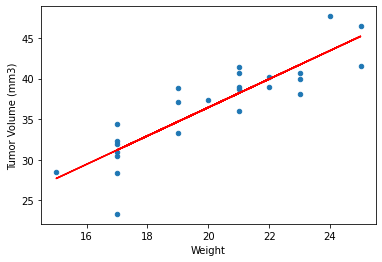

In [25]:
# Calculate the linear regression model 

x = Capomulin.iloc[:, 1].values.reshape(-1, 1)
y = Capomulin.iloc[:, 0].values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

Capomulin.plot.scatter('Weight','Tumor Volume (mm3)')
plt.plot(x, y_pred, color='red')
# for mouse weight and average tumor volume for the Capomulin regimen
